In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Reading the csv files into dataframes

In [2]:
raw_data_full = pd.read_csv('properties_2016.csv')

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
target = pd.read_csv('train_2016_v2.csv')
target.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


Merging the target csv into the properties csv features

In [4]:
raw_data = pd.merge(target, raw_data_full, on='parcelid', how='left')

In [5]:
sample_sub = pd.read_csv('sample_submission.csv')
#sample_sub.info()
#data.count()
sample_sub['parcelid'] = sample_sub['ParcelId']
test = sample_sub.merge(raw_data_full, on='parcelid', how='left')

In [6]:
raw_data.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,...,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.0,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581395,2.279474,3.031869,4.0,5.565407,2.309216,...,311.694737,1968.532870,1.440739,1.800934e+05,4.576726e+05,2015.0,2.783353e+05,5983.975927,13.402692,6.049151e+13
std,2.504510e+06,0.161079,2.974168,2.716196,437.434198,1.004271,1.156436,0.0,1.900602,0.976172,...,346.354850,23.763475,0.544498,2.091299e+05,5.548844e+05,0.0,4.004955e+05,6838.876956,2.715966,2.046605e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,...,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.0,2.200000e+01,49.080000,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,...,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.0,8.222800e+04,2872.830000,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,...,159.000000,1970.000000,1.000000,1.320000e+05,3.428720e+05,2015.0,1.929700e+05,4542.750000,14.000000,6.037615e+13
75%,1.422755e+07,0.039200,1.000000,7.000000,872.000000,3.000000,4.000000,4.0,7.000000,3.000000,...,361.000000,1987.000000,2.000000,2.105345e+05,5.405890e+05,2015.0,3.454195e+05,6901.090000,15.000000,6.059042e+13
max,1.629608e+08,4.737000,13.000000,21.000000,1555.000000,20.000000,16.000000,4.0,12.000000,20.000000,...,1366.000000,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13


In [7]:
raw_data.count()

parcelid                        90275
logerror                        90275
transactiondate                 90275
airconditioningtypeid           28781
architecturalstyletypeid          261
basementsqft                       43
bathroomcnt                     90275
bedroomcnt                      90275
buildingclasstypeid                16
buildingqualitytypeid           57364
calculatedbathnbr               89093
decktypeid                        658
finishedfloor1squarefeet         6856
calculatedfinishedsquarefeet    89614
finishedsquarefeet12            85596
finishedsquarefeet13               33
finishedsquarefeet15             3564
finishedsquarefeet50             6856
finishedsquarefeet6               421
fips                            90275
fireplacecnt                     9607
fullbathcnt                     89093
garagecarcnt                    29937
garagetotalsqft                 29937
hashottuborspa                   2365
heatingorsystemtypeid           56080
latitude    

Creating a simple benchmark model with linear regression algorithm

In [8]:
bench_data = raw_data.drop(['transactiondate'],axis=1)
bench_data_f = bench_data.drop('logerror',axis=1)
bench_data_t = bench_data['logerror']
bench_data_f = bench_data_f.drop(['propertycountylandusecode','hashottuborspa', 'propertyzoningdesc', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag'],axis=1)
bench_median_values = bench_data_f.median(axis=0)
bench_data_f = bench_data_f.fillna(bench_median_values, inplace=True)

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, make_scorer

bench_res_score = []
for i in range(10):
    bench_X_train, bench_X_test, bench_y_train, bench_y_test = train_test_split(bench_data_f, bench_data_t, test_size = 0.2)
    bench_clf = linear_model.LinearRegression()
    bench_clf.fit(bench_X_train, bench_y_train)
    bench_res_score.append(mean_absolute_error(bench_y_test,bench_clf.predict(bench_X_test)))

In [13]:
np.mean(bench_res_score)

0.068901234382507143

dropping the features which have low non-null value count, and unreasonable values for categorical variables

In [8]:
cnt_data = raw_data.count()
dropped_features = []
for i in cnt_data.keys():
    if(cnt_data[i]<10000):
        dropped_features.append(i)
data_temp = raw_data.drop(dropped_features,axis=1)
data_temp = data_temp.drop(['calculatedbathnbr'],axis=1)

In [9]:
data_temp = data_temp.drop(['pooltypeid7','assessmentyear','propertycountylandusecode','propertyzoningdesc'],axis=1)

In [10]:
data_temp[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','yearbuilt']].describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt
count,90275.000000,90275.000000,89614.000000,89519.000000
mean,2.279474,3.031869,1773.185987,1968.532870
std,1.004271,1.156436,928.162393,23.763475
min,0.000000,0.000000,2.000000,1885.000000
25%,2.000000,2.000000,1184.000000,1953.000000
50%,2.000000,3.000000,1540.000000,1970.000000
75%,3.000000,4.000000,2095.000000,1987.000000
max,20.000000,16.000000,22741.000000,2015.000000


Filling the missing data zeros and corresponding median values

In [11]:
fill_cnt_features = ['poolcnt','threequarterbathnbr','airconditioningtypeid']
for i in fill_cnt_features:
    data_temp[i].fillna(value=0,inplace=True)
median_values = data_temp.median(axis=0)
data = data_temp.fillna(median_values, inplace=True)

In [12]:
test.count()

ParcelId                        2985217
201610                          2985217
201611                          2985217
201612                          2985217
201710                          2985217
201711                          2985217
201712                          2985217
parcelid                        2985217
airconditioningtypeid            811519
architecturalstyletypeid           6061
basementsqft                       1628
bathroomcnt                     2973755
bedroomcnt                      2973767
buildingclasstypeid               12629
buildingqualitytypeid           1938488
calculatedbathnbr               2856305
decktypeid                        17096
finishedfloor1squarefeet         202717
calculatedfinishedsquarefeet    2929652
finishedsquarefeet12            2709184
finishedsquarefeet13               7672
finishedsquarefeet15             190798
finishedsquarefeet50             202717
finishedsquarefeet6               22001
fips                            2973780


Dropping the outliers

In [13]:

continuous_var= ['calculatedfinishedsquarefeet','finishedsquarefeet12','garagetotalsqft','lotsizesquarefeet','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']
for i in continuous_var:
#    print i
    ulimit = np.percentile(data[i].values, 99.5)
    llimit = np.percentile(data[i].values, 1)
    data = data[data[i] < ulimit]

In [14]:
data = data[data['bathroomcnt'] <6.5]
data = data[data['bedroomcnt'] <12]
data = data[data['garagecarcnt'] <3]
data = data[data['roomcnt'] <11]
data = data[data['unitcnt'] <6]
data = data[data['yearbuilt'] >1900]

Creating a new feature 'month' which is the transaction month from the 'transactiondate'

In [15]:
import datetime

xyz = data['transactiondate'][12]
def extract_month(x):
    datee = datetime.datetime.strptime(x, "%Y-%m-%d")
    return datee.month

data['month'] = data['transactiondate'].apply(lambda x: extract_month(x))

In [16]:
data = data.drop(['parcelid','transactiondate'],axis=1)

In [17]:
data.columns

Index([u'logerror', u'airconditioningtypeid', u'bathroomcnt', u'bedroomcnt',
       u'buildingqualitytypeid', u'calculatedfinishedsquarefeet',
       u'finishedsquarefeet12', u'fips', u'fullbathcnt', u'garagecarcnt',
       u'garagetotalsqft', u'heatingorsystemtypeid', u'latitude', u'longitude',
       u'lotsizesquarefeet', u'poolcnt', u'propertylandusetypeid',
       u'rawcensustractandblock', u'regionidcity', u'regionidcounty',
       u'regionidneighborhood', u'regionidzip', u'roomcnt',
       u'threequarterbathnbr', u'unitcnt', u'yearbuilt', u'numberofstories',
       u'structuretaxvaluedollarcnt', u'taxvaluedollarcnt',
       u'landtaxvaluedollarcnt', u'taxamount', u'censustractandblock',
       u'month'],
      dtype='object')

Distribution of the target variable - logerror

(array([  3.00000000e+00,   2.00000000e+00,   4.20000000e+01,
          6.50000000e+01,   7.56600000e+03,   7.81540000e+04,
          2.23000000e+02,   5.50000000e+01,   1.40000000e+01,
          2.00000000e+00]),
 array([-4.605, -3.7  , -2.795, -1.89 , -0.985, -0.08 ,  0.825,  1.73 ,
         2.635,  3.54 ,  4.445]),
 <a list of 10 Patch objects>)

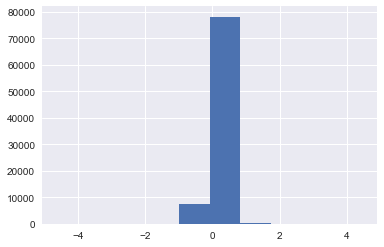

In [18]:
plt.hist(data['logerror'],bins=10)

Visualising the heatmap of correlation between target variable and some features

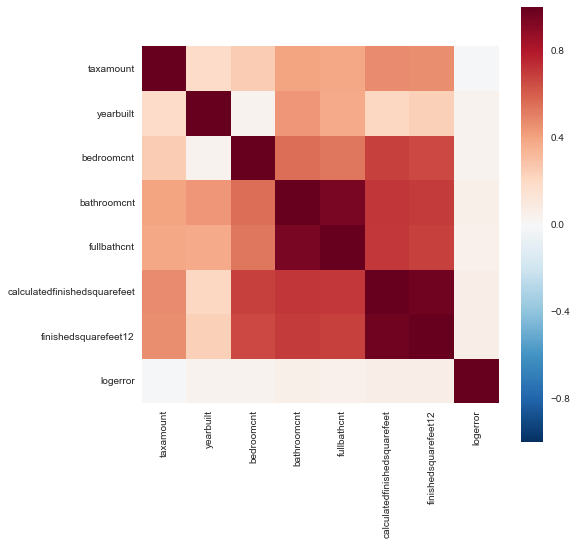

In [19]:
import seaborn as sns
cols_to_use = ['taxamount','yearbuilt','bedroomcnt','bathroomcnt','fullbathcnt','calculatedfinishedsquarefeet','finishedsquarefeet12','logerror']
#cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = data[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn

sns.heatmap(corrmat, vmax=1., square=True)

Visualisation between features and logerror, and some plots are in-between features

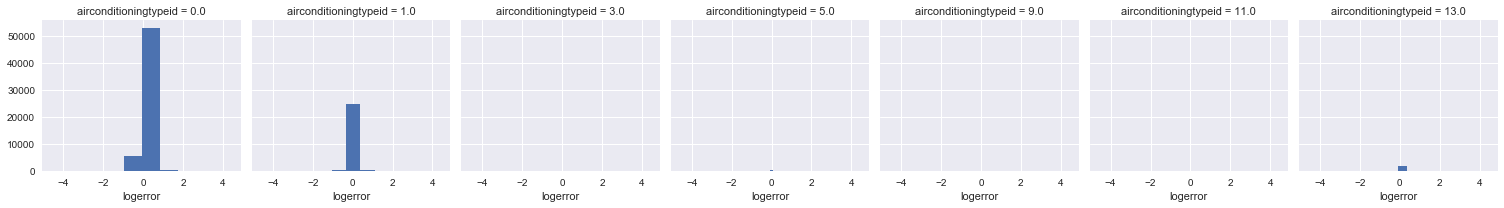

In [20]:
g = sns.FacetGrid(data,col='airconditioningtypeid')
g= g.map(plt.hist,"logerror")

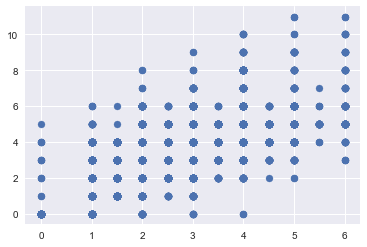

In [21]:
plt.scatter(data['bathroomcnt'],data['bedroomcnt'])

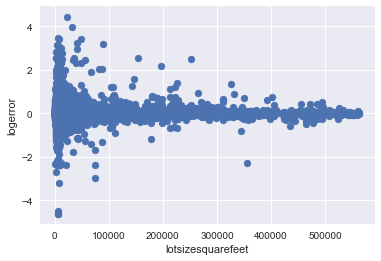

In [22]:
plt.scatter(data['lotsizesquarefeet'],data['logerror'])
plt.xlabel('lotsizesquarefeet')
plt.ylabel('logerror')
plt.show()

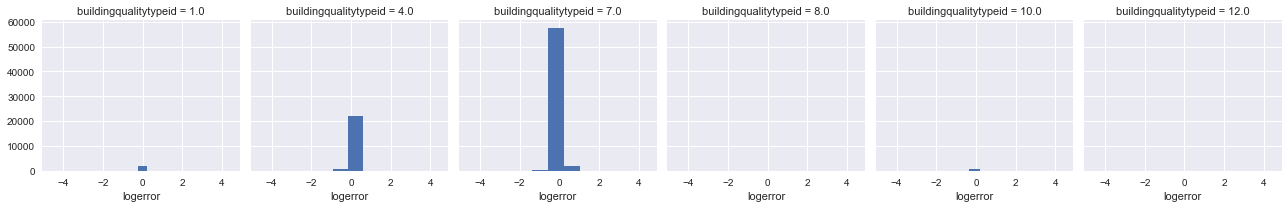

In [23]:
g = sns.FacetGrid(data,col='buildingqualitytypeid')
g= g.map(plt.hist,"logerror")

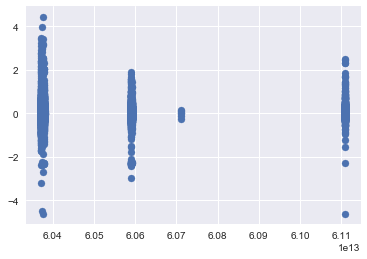

In [24]:
plt.scatter(data['censustractandblock'],data['logerror'])

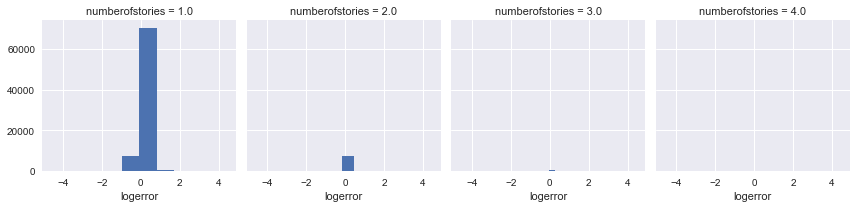

In [25]:
g = sns.FacetGrid(data,col='numberofstories')
g= g.map(plt.hist,"logerror")

In [26]:
data_f = data.drop('logerror',axis=1)
data_t = data['logerror']

In [27]:
data_f.count()

airconditioningtypeid           86126
bathroomcnt                     86126
bedroomcnt                      86126
buildingqualitytypeid           86126
calculatedfinishedsquarefeet    86126
finishedsquarefeet12            86126
fips                            86126
fullbathcnt                     86126
garagecarcnt                    86126
garagetotalsqft                 86126
heatingorsystemtypeid           86126
latitude                        86126
longitude                       86126
lotsizesquarefeet               86126
poolcnt                         86126
propertylandusetypeid           86126
rawcensustractandblock          86126
regionidcity                    86126
regionidcounty                  86126
regionidneighborhood            86126
regionidzip                     86126
roomcnt                         86126
threequarterbathnbr             86126
unitcnt                         86126
yearbuilt                       86126
numberofstories                 86126
structuretax

Linear Regression model and tuning with GridSearchCV

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, make_scorer

X_train, X_test, y_train, y_test = train_test_split(data_f, data_t, test_size = 0.2, random_state = 0)
clf = linear_model.LinearRegression()

In [29]:
clf.fit(X_train, y_train)
print mean_absolute_error(y_test,clf.predict(X_test))

0.0661949154706


In [30]:
parameters = { 'normalize':[True,False] } 
clf = linear_model.LinearRegression()
scorer = make_scorer(mean_absolute_error)

grid_obj = GridSearchCV(estimator= clf, param_grid= parameters, scoring= scorer,cv =20)
grid_fit = grid_obj.fit(X_train, y_train)

In [31]:
grid_obj.cv_results_

{'mean_fit_time': array([ 0.11204998,  0.10524998]),
 'mean_score_time': array([ 0.00190002,  0.00195001]),
 'mean_test_score': array([ 0.06702413,  0.06702413]),
 'mean_train_score': array([ 0.06697516,  0.06697518]),
 'param_normalize': masked_array(data = [True False],
              mask = [False False],
        fill_value = ?),
 'params': ({'normalize': True}, {'normalize': False}),
 'rank_test_score': array([1, 2]),
 'split0_test_score': array([ 0.0694774 ,  0.06947741]),
 'split0_train_score': array([ 0.06690916,  0.06690916]),
 'split10_test_score': array([ 0.06938394,  0.06938394]),
 'split10_train_score': array([ 0.06683973,  0.06683973]),
 'split11_test_score': array([ 0.06650795,  0.06650795]),
 'split11_train_score': array([ 0.06698585,  0.06698585]),
 'split12_test_score': array([ 0.06593865,  0.06593865]),
 'split12_train_score': array([ 0.0670527,  0.0670527]),
 'split13_test_score': array([ 0.06998171,  0.06998171]),
 'split13_train_score': array([ 0.06681011,  0.066810

In [32]:
best_clf = grid_fit.best_estimator_

print grid_obj.best_params_
print mean_absolute_error(y_test,best_clf.predict(X_test))

{'normalize': True}
0.0661949149662


Xgboost model and tuning the hyperparameters

In [33]:
import xgboost as xgb

d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_test, label=y_test)
params = {}
params['eta'] = 0.02
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 4
params['silent'] = 1

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
   
model = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100)
print mean_absolute_error(y_test,model.predict(d_valid,ntree_limit=model.best_ntree_limit))

[0]	train-mae:0.486894	valid-mae:0.486852
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[1]	train-mae:0.477486	valid-mae:0.477433
[2]	train-mae:0.468273	valid-mae:0.46821
[3]	train-mae:0.459249	valid-mae:0.459178
[4]	train-mae:0.450412	valid-mae:0.450333
[5]	train-mae:0.441757	valid-mae:0.441668
[6]	train-mae:0.433282	valid-mae:0.433175
[7]	train-mae:0.424982	valid-mae:0.424862
[8]	train-mae:0.416853	valid-mae:0.416718
[9]	train-mae:0.408892	valid-mae:0.408749
[10]	train-mae:0.401098	valid-mae:0.400944
[11]	train-mae:0.393468	valid-mae:0.393301
[12]	train-mae:0.385997	valid-mae:0.385822
[13]	train-mae:0.378681	valid-mae:0.378497
[14]	train-mae:0.37152	valid-mae:0.371321
[15]	train-mae:0.364508	valid-mae:0.364297
[16]	train-mae:0.357643	valid-mae:0.357417
[17]	train-mae:0.350925	valid-mae:0.350687
[18]	train-mae:0.344346	valid-mae:0.344095
[19]	train-mae:0.337905	valid-mae:0.337645
[20]	tra

[187]	train-mae:0.068304	valid-mae:0.068063
[188]	train-mae:0.068239	valid-mae:0.068
[189]	train-mae:0.068177	valid-mae:0.067942
[190]	train-mae:0.068117	valid-mae:0.067881
[191]	train-mae:0.068057	valid-mae:0.067821
[192]	train-mae:0.067998	valid-mae:0.067763
[193]	train-mae:0.067941	valid-mae:0.067707
[194]	train-mae:0.067886	valid-mae:0.067655
[195]	train-mae:0.067832	valid-mae:0.067603
[196]	train-mae:0.067778	valid-mae:0.067551
[197]	train-mae:0.06773	valid-mae:0.067503
[198]	train-mae:0.067682	valid-mae:0.067458
[199]	train-mae:0.067634	valid-mae:0.067414
[200]	train-mae:0.067589	valid-mae:0.067371
[201]	train-mae:0.067544	valid-mae:0.067328
[202]	train-mae:0.0675	valid-mae:0.067284
[203]	train-mae:0.067459	valid-mae:0.067243
[204]	train-mae:0.067418	valid-mae:0.067202
[205]	train-mae:0.067377	valid-mae:0.067163
[206]	train-mae:0.067342	valid-mae:0.067129
[207]	train-mae:0.067305	valid-mae:0.067095
[208]	train-mae:0.06727	valid-mae:0.067062
[209]	train-mae:0.067234	valid-mae:0.06

[375]	train-mae:0.065744	valid-mae:0.065958
[376]	train-mae:0.065743	valid-mae:0.065958
[377]	train-mae:0.065741	valid-mae:0.065959
[378]	train-mae:0.065738	valid-mae:0.06596
[379]	train-mae:0.065736	valid-mae:0.065962
[380]	train-mae:0.065734	valid-mae:0.065962
[381]	train-mae:0.065731	valid-mae:0.065961
[382]	train-mae:0.06573	valid-mae:0.06596
[383]	train-mae:0.065728	valid-mae:0.065962
[384]	train-mae:0.065727	valid-mae:0.065964
[385]	train-mae:0.065724	valid-mae:0.065964
[386]	train-mae:0.065721	valid-mae:0.065965
[387]	train-mae:0.065719	valid-mae:0.065964
[388]	train-mae:0.065717	valid-mae:0.065967
[389]	train-mae:0.065713	valid-mae:0.065965
[390]	train-mae:0.065711	valid-mae:0.065968
[391]	train-mae:0.065709	valid-mae:0.065968
[392]	train-mae:0.065707	valid-mae:0.065968
[393]	train-mae:0.065706	valid-mae:0.065968
[394]	train-mae:0.065703	valid-mae:0.065969
[395]	train-mae:0.0657	valid-mae:0.065969
[396]	train-mae:0.065698	valid-mae:0.065968
[397]	train-mae:0.065698	valid-mae:0.

In [34]:
import xgboost as xgb

d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_test, label=y_test)

res_i = []
res_j = []
res_score = []
for i in [0.01,0.02,0.03]:
    for j in [3,4,5,]:
        print i, j
        params = {}
        params['eta'] = i
        params['objective'] = 'reg:linear'
        params['eval_metric'] = 'mae'
        params['max_depth'] = j
        params['silent'] = 0

        watchlist = [(d_train, 'train'), (d_valid, 'valid')]
        #dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
        model = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100)
        res_score.append(mean_absolute_error(y_test,model.predict(d_valid,ntree_limit=model.best_ntree_limit)))
        res_i.append(i)
        res_j.append(j)

0.01 3
[0]	train-mae:0.491696	valid-mae:0.491658
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[1]	train-mae:0.486943	valid-mae:0.486901
[2]	train-mae:0.482239	valid-mae:0.482192
[3]	train-mae:0.477583	valid-mae:0.47753
[4]	train-mae:0.472976	valid-mae:0.472917
[5]	train-mae:0.468416	valid-mae:0.468352
[6]	train-mae:0.463903	valid-mae:0.463836
[7]	train-mae:0.459435	valid-mae:0.459364
[8]	train-mae:0.455014	valid-mae:0.45494
[9]	train-mae:0.45064	valid-mae:0.450561
[10]	train-mae:0.44631	valid-mae:0.446228
[11]	train-mae:0.442025	valid-mae:0.441937
[12]	train-mae:0.437785	valid-mae:0.43769
[13]	train-mae:0.433589	valid-mae:0.433487
[14]	train-mae:0.429436	valid-mae:0.429326
[15]	train-mae:0.425326	valid-mae:0.425207
[16]	train-mae:0.421259	valid-mae:0.421133
[17]	train-mae:0.417233	valid-mae:0.4171
[18]	train-mae:0.413249	valid-mae:0.413112
[19]	train-mae:0.409306	valid-mae:0.409163
[20]	t

[187]	train-mae:0.106756	valid-mae:0.106227
[188]	train-mae:0.106178	valid-mae:0.105644
[189]	train-mae:0.105607	valid-mae:0.10507
[190]	train-mae:0.105044	valid-mae:0.104502
[191]	train-mae:0.104487	valid-mae:0.103941
[192]	train-mae:0.103938	valid-mae:0.103388
[193]	train-mae:0.103396	valid-mae:0.102842
[194]	train-mae:0.102859	valid-mae:0.102302
[195]	train-mae:0.102331	valid-mae:0.101772
[196]	train-mae:0.101809	valid-mae:0.101249
[197]	train-mae:0.101293	valid-mae:0.10073
[198]	train-mae:0.100786	valid-mae:0.100221
[199]	train-mae:0.100283	valid-mae:0.099717
[200]	train-mae:0.099789	valid-mae:0.099222
[201]	train-mae:0.0993	valid-mae:0.098734
[202]	train-mae:0.098818	valid-mae:0.098251
[203]	train-mae:0.098343	valid-mae:0.097775
[204]	train-mae:0.097873	valid-mae:0.097305
[205]	train-mae:0.097411	valid-mae:0.096842
[206]	train-mae:0.096954	valid-mae:0.096383
[207]	train-mae:0.096505	valid-mae:0.095933
[208]	train-mae:0.09606	valid-mae:0.095485
[209]	train-mae:0.095621	valid-mae:0.

[375]	train-mae:0.068584	valid-mae:0.068102
[376]	train-mae:0.06855	valid-mae:0.068069
[377]	train-mae:0.068517	valid-mae:0.068036
[378]	train-mae:0.068485	valid-mae:0.068004
[379]	train-mae:0.068453	valid-mae:0.067972
[380]	train-mae:0.068421	valid-mae:0.067942
[381]	train-mae:0.068391	valid-mae:0.067913
[382]	train-mae:0.06836	valid-mae:0.067882
[383]	train-mae:0.06833	valid-mae:0.067852
[384]	train-mae:0.0683	valid-mae:0.067822
[385]	train-mae:0.06827	valid-mae:0.067793
[386]	train-mae:0.068239	valid-mae:0.067762
[387]	train-mae:0.068211	valid-mae:0.067735
[388]	train-mae:0.068183	valid-mae:0.067708
[389]	train-mae:0.068156	valid-mae:0.067679
[390]	train-mae:0.068129	valid-mae:0.067652
[391]	train-mae:0.068102	valid-mae:0.067626
[392]	train-mae:0.068076	valid-mae:0.067602
[393]	train-mae:0.06805	valid-mae:0.067577
[394]	train-mae:0.068024	valid-mae:0.067551
[395]	train-mae:0.067998	valid-mae:0.067525
[396]	train-mae:0.067973	valid-mae:0.067501
[397]	train-mae:0.06795	valid-mae:0.067

[563]	train-mae:0.066382	valid-mae:0.065991
[564]	train-mae:0.066379	valid-mae:0.065989
[565]	train-mae:0.066376	valid-mae:0.065987
[566]	train-mae:0.066374	valid-mae:0.065985
[567]	train-mae:0.066372	valid-mae:0.065984
[568]	train-mae:0.066369	valid-mae:0.065981
[569]	train-mae:0.066366	valid-mae:0.065979
[570]	train-mae:0.066363	valid-mae:0.065976
[571]	train-mae:0.06636	valid-mae:0.065974
[572]	train-mae:0.066358	valid-mae:0.065972
[573]	train-mae:0.066355	valid-mae:0.06597
[574]	train-mae:0.066352	valid-mae:0.065968
[575]	train-mae:0.06635	valid-mae:0.065966
[576]	train-mae:0.066346	valid-mae:0.065963
[577]	train-mae:0.066343	valid-mae:0.065961
[578]	train-mae:0.066341	valid-mae:0.065959
[579]	train-mae:0.066338	valid-mae:0.065957
[580]	train-mae:0.066335	valid-mae:0.065955
[581]	train-mae:0.066333	valid-mae:0.065953
[582]	train-mae:0.06633	valid-mae:0.065951
[583]	train-mae:0.066328	valid-mae:0.06595
[584]	train-mae:0.066325	valid-mae:0.065948
[585]	train-mae:0.066324	valid-mae:0.

[751]	train-mae:0.066089	valid-mae:0.065836
[752]	train-mae:0.066088	valid-mae:0.065835
[753]	train-mae:0.066086	valid-mae:0.065836
[754]	train-mae:0.066087	valid-mae:0.065837
[755]	train-mae:0.066085	valid-mae:0.065836
[756]	train-mae:0.066084	valid-mae:0.065836
[757]	train-mae:0.066084	valid-mae:0.065836
[758]	train-mae:0.066083	valid-mae:0.065837
[759]	train-mae:0.066083	valid-mae:0.065837
[760]	train-mae:0.066082	valid-mae:0.065837
[761]	train-mae:0.066081	valid-mae:0.065836
[762]	train-mae:0.06608	valid-mae:0.065836
[763]	train-mae:0.066079	valid-mae:0.065836
[764]	train-mae:0.066079	valid-mae:0.065837
[765]	train-mae:0.066078	valid-mae:0.065838
[766]	train-mae:0.066076	valid-mae:0.065838
[767]	train-mae:0.066076	valid-mae:0.065838
[768]	train-mae:0.066075	valid-mae:0.065838
[769]	train-mae:0.066074	valid-mae:0.065838
[770]	train-mae:0.066074	valid-mae:0.065838
[771]	train-mae:0.066073	valid-mae:0.065838
[772]	train-mae:0.066072	valid-mae:0.065837
[773]	train-mae:0.066071	valid-ma

[86]	train-mae:0.221323	valid-mae:0.220901
[87]	train-mae:0.219421	valid-mae:0.219001
[88]	train-mae:0.217541	valid-mae:0.217121
[89]	train-mae:0.215682	valid-mae:0.215264
[90]	train-mae:0.213842	valid-mae:0.213426
[91]	train-mae:0.212022	valid-mae:0.211608
[92]	train-mae:0.210223	valid-mae:0.209811
[93]	train-mae:0.208443	valid-mae:0.208033
[94]	train-mae:0.206683	valid-mae:0.206275
[95]	train-mae:0.204942	valid-mae:0.204535
[96]	train-mae:0.203221	valid-mae:0.202813
[97]	train-mae:0.20152	valid-mae:0.201111
[98]	train-mae:0.199837	valid-mae:0.199428
[99]	train-mae:0.198172	valid-mae:0.197765
[100]	train-mae:0.196526	valid-mae:0.19612
[101]	train-mae:0.194899	valid-mae:0.194492
[102]	train-mae:0.193289	valid-mae:0.192882
[103]	train-mae:0.191698	valid-mae:0.19129
[104]	train-mae:0.190125	valid-mae:0.189715
[105]	train-mae:0.188569	valid-mae:0.188158
[106]	train-mae:0.18703	valid-mae:0.186619
[107]	train-mae:0.185509	valid-mae:0.185096
[108]	train-mae:0.184005	valid-mae:0.183593
[109]	

[274]	train-mae:0.076918	valid-mae:0.076564
[275]	train-mae:0.076752	valid-mae:0.076398
[276]	train-mae:0.076589	valid-mae:0.076236
[277]	train-mae:0.076426	valid-mae:0.076074
[278]	train-mae:0.076265	valid-mae:0.075914
[279]	train-mae:0.076108	valid-mae:0.075758
[280]	train-mae:0.075953	valid-mae:0.075605
[281]	train-mae:0.0758	valid-mae:0.075452
[282]	train-mae:0.075649	valid-mae:0.075301
[283]	train-mae:0.075502	valid-mae:0.075156
[284]	train-mae:0.075357	valid-mae:0.075011
[285]	train-mae:0.075212	valid-mae:0.074869
[286]	train-mae:0.07507	valid-mae:0.074727
[287]	train-mae:0.074931	valid-mae:0.07459
[288]	train-mae:0.074795	valid-mae:0.074455
[289]	train-mae:0.07466	valid-mae:0.074322
[290]	train-mae:0.074527	valid-mae:0.074191
[291]	train-mae:0.074396	valid-mae:0.07406
[292]	train-mae:0.074268	valid-mae:0.073935
[293]	train-mae:0.074142	valid-mae:0.07381
[294]	train-mae:0.074017	valid-mae:0.073689
[295]	train-mae:0.073894	valid-mae:0.073567
[296]	train-mae:0.073773	valid-mae:0.07

[462]	train-mae:0.066687	valid-mae:0.066529
[463]	train-mae:0.066677	valid-mae:0.066521
[464]	train-mae:0.066667	valid-mae:0.066513
[465]	train-mae:0.066657	valid-mae:0.066505
[466]	train-mae:0.066648	valid-mae:0.066496
[467]	train-mae:0.066638	valid-mae:0.066487
[468]	train-mae:0.066628	valid-mae:0.066478
[469]	train-mae:0.066619	valid-mae:0.06647
[470]	train-mae:0.066609	valid-mae:0.066461
[471]	train-mae:0.066601	valid-mae:0.066454
[472]	train-mae:0.066592	valid-mae:0.066446
[473]	train-mae:0.066583	valid-mae:0.066437
[474]	train-mae:0.066575	valid-mae:0.066431
[475]	train-mae:0.066566	valid-mae:0.066423
[476]	train-mae:0.066558	valid-mae:0.066415
[477]	train-mae:0.066549	valid-mae:0.066408
[478]	train-mae:0.066541	valid-mae:0.066402
[479]	train-mae:0.066533	valid-mae:0.066395
[480]	train-mae:0.066525	valid-mae:0.066388
[481]	train-mae:0.066518	valid-mae:0.066382
[482]	train-mae:0.066509	valid-mae:0.066376
[483]	train-mae:0.066501	valid-mae:0.06637
[484]	train-mae:0.066493	valid-mae

[650]	train-mae:0.065895	valid-mae:0.065982
[651]	train-mae:0.065893	valid-mae:0.065982
[652]	train-mae:0.065891	valid-mae:0.065981
[653]	train-mae:0.065889	valid-mae:0.065982
[654]	train-mae:0.065887	valid-mae:0.065981
[655]	train-mae:0.065885	valid-mae:0.06598
[656]	train-mae:0.065884	valid-mae:0.065979
[657]	train-mae:0.065881	valid-mae:0.065977
[658]	train-mae:0.06588	valid-mae:0.065977
[659]	train-mae:0.065878	valid-mae:0.065978
[660]	train-mae:0.065877	valid-mae:0.065978
[661]	train-mae:0.065875	valid-mae:0.065977
[662]	train-mae:0.065873	valid-mae:0.065976
[663]	train-mae:0.065871	valid-mae:0.065975
[664]	train-mae:0.065869	valid-mae:0.065975
[665]	train-mae:0.065867	valid-mae:0.065974
[666]	train-mae:0.065865	valid-mae:0.065974
[667]	train-mae:0.065864	valid-mae:0.065974
[668]	train-mae:0.065862	valid-mae:0.065973
[669]	train-mae:0.065861	valid-mae:0.065973
[670]	train-mae:0.06586	valid-mae:0.065972
[671]	train-mae:0.065858	valid-mae:0.065971
[672]	train-mae:0.065857	valid-mae:

[23]	train-mae:0.393905	valid-mae:0.393755
[24]	train-mae:0.390163	valid-mae:0.39001
[25]	train-mae:0.38646	valid-mae:0.386301
[26]	train-mae:0.382795	valid-mae:0.382632
[27]	train-mae:0.379169	valid-mae:0.379002
[28]	train-mae:0.375581	valid-mae:0.37541
[29]	train-mae:0.372031	valid-mae:0.371854
[30]	train-mae:0.368518	valid-mae:0.368335
[31]	train-mae:0.36504	valid-mae:0.364853
[32]	train-mae:0.3616	valid-mae:0.361406
[33]	train-mae:0.358196	valid-mae:0.357997
[34]	train-mae:0.354828	valid-mae:0.354621
[35]	train-mae:0.351496	valid-mae:0.351282
[36]	train-mae:0.348199	valid-mae:0.347977
[37]	train-mae:0.344937	valid-mae:0.344709
[38]	train-mae:0.341708	valid-mae:0.341475
[39]	train-mae:0.338515	valid-mae:0.338277
[40]	train-mae:0.335354	valid-mae:0.335112
[41]	train-mae:0.332227	valid-mae:0.33198
[42]	train-mae:0.329133	valid-mae:0.328881
[43]	train-mae:0.326073	valid-mae:0.325815
[44]	train-mae:0.323043	valid-mae:0.322781
[45]	train-mae:0.320046	valid-mae:0.319779
[46]	train-mae:0.3

[213]	train-mae:0.093539	valid-mae:0.093268
[214]	train-mae:0.093128	valid-mae:0.092857
[215]	train-mae:0.092723	valid-mae:0.092454
[216]	train-mae:0.092324	valid-mae:0.092055
[217]	train-mae:0.09193	valid-mae:0.091661
[218]	train-mae:0.09154	valid-mae:0.091272
[219]	train-mae:0.091157	valid-mae:0.09089
[220]	train-mae:0.09078	valid-mae:0.090512
[221]	train-mae:0.090409	valid-mae:0.09014
[222]	train-mae:0.090041	valid-mae:0.089774
[223]	train-mae:0.089678	valid-mae:0.089411
[224]	train-mae:0.089318	valid-mae:0.089053
[225]	train-mae:0.088964	valid-mae:0.088701
[226]	train-mae:0.088616	valid-mae:0.088355
[227]	train-mae:0.088274	valid-mae:0.088012
[228]	train-mae:0.087937	valid-mae:0.087676
[229]	train-mae:0.087604	valid-mae:0.087343
[230]	train-mae:0.087274	valid-mae:0.087016
[231]	train-mae:0.086951	valid-mae:0.086693
[232]	train-mae:0.086634	valid-mae:0.086377
[233]	train-mae:0.086319	valid-mae:0.086064
[234]	train-mae:0.086007	valid-mae:0.085755
[235]	train-mae:0.085701	valid-mae:0.

[401]	train-mae:0.067323	valid-mae:0.067424
[402]	train-mae:0.067299	valid-mae:0.067402
[403]	train-mae:0.067276	valid-mae:0.067381
[404]	train-mae:0.067253	valid-mae:0.067359
[405]	train-mae:0.067231	valid-mae:0.067339
[406]	train-mae:0.067208	valid-mae:0.067318
[407]	train-mae:0.067186	valid-mae:0.067298
[408]	train-mae:0.067164	valid-mae:0.067278
[409]	train-mae:0.067142	valid-mae:0.067259
[410]	train-mae:0.067121	valid-mae:0.06724
[411]	train-mae:0.0671	valid-mae:0.06722
[412]	train-mae:0.06708	valid-mae:0.067202
[413]	train-mae:0.067061	valid-mae:0.067183
[414]	train-mae:0.067042	valid-mae:0.067168
[415]	train-mae:0.067023	valid-mae:0.06715
[416]	train-mae:0.067003	valid-mae:0.067133
[417]	train-mae:0.066984	valid-mae:0.067116
[418]	train-mae:0.066965	valid-mae:0.067099
[419]	train-mae:0.066946	valid-mae:0.067082
[420]	train-mae:0.066928	valid-mae:0.067065
[421]	train-mae:0.066911	valid-mae:0.067049
[422]	train-mae:0.066893	valid-mae:0.067033
[423]	train-mae:0.066875	valid-mae:0.0

[589]	train-mae:0.065622	valid-mae:0.066099
[590]	train-mae:0.065618	valid-mae:0.066098
[591]	train-mae:0.065616	valid-mae:0.066097
[592]	train-mae:0.065613	valid-mae:0.066094
[593]	train-mae:0.065611	valid-mae:0.066093
[594]	train-mae:0.065608	valid-mae:0.066092
[595]	train-mae:0.065605	valid-mae:0.06609
[596]	train-mae:0.065602	valid-mae:0.06609
[597]	train-mae:0.065599	valid-mae:0.066088
[598]	train-mae:0.065597	valid-mae:0.066087
[599]	train-mae:0.065594	valid-mae:0.066085
[600]	train-mae:0.065591	valid-mae:0.066085
[601]	train-mae:0.065588	valid-mae:0.066084
[602]	train-mae:0.065585	valid-mae:0.066084
[603]	train-mae:0.065583	valid-mae:0.066083
[604]	train-mae:0.06558	valid-mae:0.066082
[605]	train-mae:0.065578	valid-mae:0.06608
[606]	train-mae:0.065576	valid-mae:0.066079
[607]	train-mae:0.065573	valid-mae:0.066079
[608]	train-mae:0.065571	valid-mae:0.066079
[609]	train-mae:0.065567	valid-mae:0.066076
[610]	train-mae:0.065565	valid-mae:0.066075
[611]	train-mae:0.065562	valid-mae:0

Stopping. Best iteration:
[675]	train-mae:0.065419	valid-mae:0.066053

0.02 3
[0]	train-mae:0.486895	valid-mae:0.486853
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[1]	train-mae:0.477489	valid-mae:0.477436
[2]	train-mae:0.468278	valid-mae:0.468214
[3]	train-mae:0.459255	valid-mae:0.459185
[4]	train-mae:0.450419	valid-mae:0.450339
[5]	train-mae:0.441766	valid-mae:0.441678
[6]	train-mae:0.433292	valid-mae:0.433189
[7]	train-mae:0.424994	valid-mae:0.424878
[8]	train-mae:0.416868	valid-mae:0.416735
[9]	train-mae:0.408908	valid-mae:0.408769
[10]	train-mae:0.401114	valid-mae:0.400965
[11]	train-mae:0.393485	valid-mae:0.393323
[12]	train-mae:0.386015	valid-mae:0.385844
[13]	train-mae:0.378701	valid-mae:0.378518
[14]	train-mae:0.371542	valid-mae:0.371346
[15]	train-mae:0.364531	valid-mae:0.364319
[16]	train-mae:0.357668	valid-mae:0.357439
[17]	train-mae:0.35095	valid-mae:0.35071
[18]	train-mae:0

[185]	train-mae:0.068646	valid-mae:0.068144
[186]	train-mae:0.068577	valid-mae:0.068079
[187]	train-mae:0.068509	valid-mae:0.068014
[188]	train-mae:0.068445	valid-mae:0.067949
[189]	train-mae:0.06838	valid-mae:0.067885
[190]	train-mae:0.068319	valid-mae:0.067824
[191]	train-mae:0.06826	valid-mae:0.067766
[192]	train-mae:0.068202	valid-mae:0.06771
[193]	train-mae:0.068145	valid-mae:0.067653
[194]	train-mae:0.068091	valid-mae:0.067599
[195]	train-mae:0.068038	valid-mae:0.067546
[196]	train-mae:0.067989	valid-mae:0.0675
[197]	train-mae:0.067938	valid-mae:0.067452
[198]	train-mae:0.067891	valid-mae:0.067405
[199]	train-mae:0.067846	valid-mae:0.067359
[200]	train-mae:0.0678	valid-mae:0.067315
[201]	train-mae:0.067758	valid-mae:0.067272
[202]	train-mae:0.067714	valid-mae:0.06723
[203]	train-mae:0.067672	valid-mae:0.067187
[204]	train-mae:0.067632	valid-mae:0.067152
[205]	train-mae:0.067594	valid-mae:0.067113
[206]	train-mae:0.067557	valid-mae:0.067076
[207]	train-mae:0.06752	valid-mae:0.0670

[373]	train-mae:0.06609	valid-mae:0.065831
[374]	train-mae:0.066088	valid-mae:0.065832
[375]	train-mae:0.066086	valid-mae:0.065831
[376]	train-mae:0.066084	valid-mae:0.065831
[377]	train-mae:0.066082	valid-mae:0.06583
[378]	train-mae:0.066081	valid-mae:0.06583
[379]	train-mae:0.066079	valid-mae:0.06583
[380]	train-mae:0.066078	valid-mae:0.06583
[381]	train-mae:0.066076	valid-mae:0.06583
[382]	train-mae:0.066074	valid-mae:0.06583
[383]	train-mae:0.066073	valid-mae:0.06583
[384]	train-mae:0.066072	valid-mae:0.06583
[385]	train-mae:0.06607	valid-mae:0.065829
[386]	train-mae:0.066069	valid-mae:0.065829
[387]	train-mae:0.066068	valid-mae:0.06583
[388]	train-mae:0.066066	valid-mae:0.065829
[389]	train-mae:0.066063	valid-mae:0.065827
[390]	train-mae:0.066062	valid-mae:0.065826
[391]	train-mae:0.066062	valid-mae:0.065827
[392]	train-mae:0.06606	valid-mae:0.065827
[393]	train-mae:0.066059	valid-mae:0.065829
[394]	train-mae:0.066056	valid-mae:0.065827
[395]	train-mae:0.066055	valid-mae:0.065828


[66]	train-mae:0.150682	valid-mae:0.150256
[67]	train-mae:0.14846	valid-mae:0.148036
[68]	train-mae:0.146292	valid-mae:0.14587
[69]	train-mae:0.144172	valid-mae:0.143751
[70]	train-mae:0.142099	valid-mae:0.14168
[71]	train-mae:0.140077	valid-mae:0.139662
[72]	train-mae:0.138101	valid-mae:0.137688
[73]	train-mae:0.136175	valid-mae:0.135767
[74]	train-mae:0.134291	valid-mae:0.133886
[75]	train-mae:0.132453	valid-mae:0.132054
[76]	train-mae:0.130659	valid-mae:0.130262
[77]	train-mae:0.128908	valid-mae:0.128513
[78]	train-mae:0.127198	valid-mae:0.1268
[79]	train-mae:0.125529	valid-mae:0.125134
[80]	train-mae:0.123904	valid-mae:0.123508
[81]	train-mae:0.122316	valid-mae:0.121921
[82]	train-mae:0.120764	valid-mae:0.120375
[83]	train-mae:0.119252	valid-mae:0.118869
[84]	train-mae:0.117775	valid-mae:0.11739
[85]	train-mae:0.116337	valid-mae:0.11595
[86]	train-mae:0.114932	valid-mae:0.114548
[87]	train-mae:0.113566	valid-mae:0.11318
[88]	train-mae:0.112232	valid-mae:0.111844
[89]	train-mae:0.11

[254]	train-mae:0.066315	valid-mae:0.066204
[255]	train-mae:0.066305	valid-mae:0.066196
[256]	train-mae:0.066295	valid-mae:0.066187
[257]	train-mae:0.066283	valid-mae:0.066179
[258]	train-mae:0.066273	valid-mae:0.066172
[259]	train-mae:0.066265	valid-mae:0.066164
[260]	train-mae:0.066255	valid-mae:0.066156
[261]	train-mae:0.066244	valid-mae:0.066149
[262]	train-mae:0.066234	valid-mae:0.066141
[263]	train-mae:0.066224	valid-mae:0.066133
[264]	train-mae:0.066217	valid-mae:0.06613
[265]	train-mae:0.066209	valid-mae:0.066127
[266]	train-mae:0.0662	valid-mae:0.066119
[267]	train-mae:0.066192	valid-mae:0.066113
[268]	train-mae:0.066185	valid-mae:0.066109
[269]	train-mae:0.066174	valid-mae:0.066104
[270]	train-mae:0.066167	valid-mae:0.066098
[271]	train-mae:0.066158	valid-mae:0.066094
[272]	train-mae:0.06615	valid-mae:0.066089
[273]	train-mae:0.066142	valid-mae:0.066083
[274]	train-mae:0.066135	valid-mae:0.066077
[275]	train-mae:0.066127	valid-mae:0.066074
[276]	train-mae:0.06612	valid-mae:0.

[442]	train-mae:0.065622	valid-mae:0.066
[443]	train-mae:0.065621	valid-mae:0.066
[444]	train-mae:0.06562	valid-mae:0.066002
[445]	train-mae:0.065619	valid-mae:0.066004
[446]	train-mae:0.065617	valid-mae:0.066003
[447]	train-mae:0.065615	valid-mae:0.066002
[448]	train-mae:0.065614	valid-mae:0.066004
[449]	train-mae:0.065612	valid-mae:0.066003
[450]	train-mae:0.06561	valid-mae:0.066003
[451]	train-mae:0.065607	valid-mae:0.066004
[452]	train-mae:0.065606	valid-mae:0.066005
[453]	train-mae:0.065604	valid-mae:0.066004
Stopping. Best iteration:
[353]	train-mae:0.065797	valid-mae:0.065953

0.02 5
[0]	train-mae:0.486892	valid-mae:0.486851
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[1]	train-mae:0.477483	valid-mae:0.477431
[2]	train-mae:0.468268	valid-mae:0.468207
[3]	train-mae:0.459242	valid-mae:0.459174
[4]	train-mae:0.450402	valid-mae:0.450327
[5]	train-mae:0.441746	valid-mae:0.441663
[6]	tr

[174]	train-mae:0.069096	valid-mae:0.069104
[175]	train-mae:0.068994	valid-mae:0.069009
[176]	train-mae:0.068896	valid-mae:0.068916
[177]	train-mae:0.068803	valid-mae:0.068826
[178]	train-mae:0.068712	valid-mae:0.068738
[179]	train-mae:0.068623	valid-mae:0.068651
[180]	train-mae:0.068537	valid-mae:0.068567
[181]	train-mae:0.068457	valid-mae:0.068493
[182]	train-mae:0.068376	valid-mae:0.068416
[183]	train-mae:0.068297	valid-mae:0.068342
[184]	train-mae:0.068221	valid-mae:0.068269
[185]	train-mae:0.068149	valid-mae:0.0682
[186]	train-mae:0.068077	valid-mae:0.068133
[187]	train-mae:0.068009	valid-mae:0.068067
[188]	train-mae:0.067938	valid-mae:0.068001
[189]	train-mae:0.067871	valid-mae:0.067941
[190]	train-mae:0.067808	valid-mae:0.06788
[191]	train-mae:0.067745	valid-mae:0.067823
[192]	train-mae:0.067687	valid-mae:0.067769
[193]	train-mae:0.067632	valid-mae:0.067721
[194]	train-mae:0.067575	valid-mae:0.067668
[195]	train-mae:0.067518	valid-mae:0.067616
[196]	train-mae:0.067464	valid-mae:

[362]	train-mae:0.065315	valid-mae:0.066049
[363]	train-mae:0.065313	valid-mae:0.066049
[364]	train-mae:0.06531	valid-mae:0.06605
[365]	train-mae:0.065307	valid-mae:0.06605
[366]	train-mae:0.065304	valid-mae:0.06605
[367]	train-mae:0.065302	valid-mae:0.066052
[368]	train-mae:0.065297	valid-mae:0.066051
[369]	train-mae:0.065294	valid-mae:0.066053
[370]	train-mae:0.065289	valid-mae:0.066052
[371]	train-mae:0.065285	valid-mae:0.066051
[372]	train-mae:0.065281	valid-mae:0.06605
[373]	train-mae:0.065281	valid-mae:0.066055
[374]	train-mae:0.065278	valid-mae:0.066055
[375]	train-mae:0.065275	valid-mae:0.066055
[376]	train-mae:0.065271	valid-mae:0.066055
[377]	train-mae:0.065268	valid-mae:0.066056
[378]	train-mae:0.065265	valid-mae:0.066055
[379]	train-mae:0.065264	valid-mae:0.066056
[380]	train-mae:0.065258	valid-mae:0.066059
[381]	train-mae:0.065254	valid-mae:0.066059
[382]	train-mae:0.065252	valid-mae:0.066059
[383]	train-mae:0.065247	valid-mae:0.066058
[384]	train-mae:0.065243	valid-mae:0.

[103]	train-mae:0.072079	valid-mae:0.071556
[104]	train-mae:0.071813	valid-mae:0.071288
[105]	train-mae:0.071561	valid-mae:0.071034
[106]	train-mae:0.071318	valid-mae:0.070791
[107]	train-mae:0.071091	valid-mae:0.070565
[108]	train-mae:0.070873	valid-mae:0.070348
[109]	train-mae:0.070662	valid-mae:0.070137
[110]	train-mae:0.070462	valid-mae:0.069936
[111]	train-mae:0.070272	valid-mae:0.069746
[112]	train-mae:0.070091	valid-mae:0.069563
[113]	train-mae:0.069919	valid-mae:0.069396
[114]	train-mae:0.069758	valid-mae:0.069236
[115]	train-mae:0.069602	valid-mae:0.069082
[116]	train-mae:0.069456	valid-mae:0.068937
[117]	train-mae:0.069317	valid-mae:0.068799
[118]	train-mae:0.069179	valid-mae:0.068663
[119]	train-mae:0.069051	valid-mae:0.068534
[120]	train-mae:0.068929	valid-mae:0.068415
[121]	train-mae:0.068811	valid-mae:0.068301
[122]	train-mae:0.068703	valid-mae:0.068192
[123]	train-mae:0.068599	valid-mae:0.068092
[124]	train-mae:0.0685	valid-mae:0.067992
[125]	train-mae:0.0684	valid-mae:0

[291]	train-mae:0.066009	valid-mae:0.065843
[292]	train-mae:0.066009	valid-mae:0.065844
[293]	train-mae:0.066008	valid-mae:0.065845
[294]	train-mae:0.066005	valid-mae:0.065844
[295]	train-mae:0.066003	valid-mae:0.065843
[296]	train-mae:0.066002	valid-mae:0.065844
[297]	train-mae:0.066003	valid-mae:0.065849
[298]	train-mae:0.066002	valid-mae:0.06585
[299]	train-mae:0.065999	valid-mae:0.065852
[300]	train-mae:0.066	valid-mae:0.065855
[301]	train-mae:0.065997	valid-mae:0.065854
[302]	train-mae:0.065996	valid-mae:0.065854
[303]	train-mae:0.065995	valid-mae:0.065854
[304]	train-mae:0.065992	valid-mae:0.065852
[305]	train-mae:0.065991	valid-mae:0.065853
[306]	train-mae:0.065991	valid-mae:0.065853
[307]	train-mae:0.06599	valid-mae:0.065853
[308]	train-mae:0.065988	valid-mae:0.065853
[309]	train-mae:0.065987	valid-mae:0.065854
[310]	train-mae:0.065986	valid-mae:0.065854
[311]	train-mae:0.065984	valid-mae:0.065855
[312]	train-mae:0.065983	valid-mae:0.065854
[313]	train-mae:0.065982	valid-mae:0.

[150]	train-mae:0.06676	valid-mae:0.06656
[151]	train-mae:0.06673	valid-mae:0.066532
[152]	train-mae:0.066698	valid-mae:0.066504
[153]	train-mae:0.066668	valid-mae:0.066476
[154]	train-mae:0.066641	valid-mae:0.066452
[155]	train-mae:0.066611	valid-mae:0.066423
[156]	train-mae:0.066583	valid-mae:0.066398
[157]	train-mae:0.066558	valid-mae:0.066377
[158]	train-mae:0.066533	valid-mae:0.066356
[159]	train-mae:0.066509	valid-mae:0.066338
[160]	train-mae:0.066487	valid-mae:0.066321
[161]	train-mae:0.066464	valid-mae:0.0663
[162]	train-mae:0.066443	valid-mae:0.066281
[163]	train-mae:0.066421	valid-mae:0.066261
[164]	train-mae:0.066402	valid-mae:0.066245
[165]	train-mae:0.066384	valid-mae:0.06623
[166]	train-mae:0.066368	valid-mae:0.066215
[167]	train-mae:0.066351	valid-mae:0.066202
[168]	train-mae:0.066333	valid-mae:0.066186
[169]	train-mae:0.066316	valid-mae:0.066172
[170]	train-mae:0.066302	valid-mae:0.06616
[171]	train-mae:0.066283	valid-mae:0.066148
[172]	train-mae:0.066267	valid-mae:0.06

Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[1]	train-mae:0.468128	valid-mae:0.468066
[2]	train-mae:0.454595	valid-mae:0.454524
[3]	train-mae:0.441483	valid-mae:0.441401
[4]	train-mae:0.428778	valid-mae:0.428672
[5]	train-mae:0.416467	valid-mae:0.416344
[6]	train-mae:0.404538	valid-mae:0.404399
[7]	train-mae:0.392984	valid-mae:0.392828
[8]	train-mae:0.381792	valid-mae:0.381626
[9]	train-mae:0.370951	valid-mae:0.37077
[10]	train-mae:0.360449	valid-mae:0.360253
[11]	train-mae:0.35028	valid-mae:0.350061
[12]	train-mae:0.340431	valid-mae:0.340194
[13]	train-mae:0.330898	valid-mae:0.330643
[14]	train-mae:0.321662	valid-mae:0.321394
[15]	train-mae:0.312719	valid-mae:0.312437
[16]	train-mae:0.304063	valid-mae:0.303773
[17]	train-mae:0.295684	valid-mae:0.295382
[18]	train-mae:0.287576	valid-mae:0.287252
[19]	train-mae:0.279727	valid-mae:0.279382
[20]	train-mae:0.27213	valid-mae:0.271769
[21]	tra

[188]	train-mae:0.065698	valid-mae:0.066125
[189]	train-mae:0.065689	valid-mae:0.066123
[190]	train-mae:0.065679	valid-mae:0.066119
[191]	train-mae:0.065667	valid-mae:0.066113
[192]	train-mae:0.065657	valid-mae:0.066106
[193]	train-mae:0.065649	valid-mae:0.066105
[194]	train-mae:0.06564	valid-mae:0.0661
[195]	train-mae:0.06563	valid-mae:0.066095
[196]	train-mae:0.06562	valid-mae:0.066092
[197]	train-mae:0.065612	valid-mae:0.066092
[198]	train-mae:0.065604	valid-mae:0.066089
[199]	train-mae:0.065599	valid-mae:0.066089
[200]	train-mae:0.065588	valid-mae:0.066084
[201]	train-mae:0.065578	valid-mae:0.066077
[202]	train-mae:0.065571	valid-mae:0.066074
[203]	train-mae:0.065563	valid-mae:0.066073
[204]	train-mae:0.065556	valid-mae:0.066069
[205]	train-mae:0.06555	valid-mae:0.066066
[206]	train-mae:0.065539	valid-mae:0.066062
[207]	train-mae:0.065532	valid-mae:0.066062
[208]	train-mae:0.065523	valid-mae:0.066059
[209]	train-mae:0.065515	valid-mae:0.066059
[210]	train-mae:0.065507	valid-mae:0.0

In [35]:
print res_score
print min(res_score)

[0.065834354881386059, 0.065968308755275498, 0.066052951755183748, 0.065826473189867368, 0.065952949713951992, 0.066043142095074933, 0.065825388156436238, 0.065925210432467601, 0.066046498774416443]
0.0658253881564


Sensitivity Analysis

In [41]:
res_score_sens = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data_f, data_t, test_size = 0.2)
    d_train = xgb.DMatrix(X_train, label=y_train)
    d_valid = xgb.DMatrix(X_test, label=y_test)
    params = {}
    params['eta'] = 0.03
    params['objective'] = 'reg:linear'
    params['eval_metric'] = 'mae'
    params['max_depth'] = 3
    params['silent'] = 1

    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    #dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
    model = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100)
    res_score_sens.append(mean_absolute_error(y_test,model.predict(d_valid,ntree_limit=model.best_ntree_limit)))

[0]	train-mae:0.482298	valid-mae:0.481187
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[1]	train-mae:0.468325	valid-mae:0.467222
[2]	train-mae:0.454784	valid-mae:0.453687
[3]	train-mae:0.441663	valid-mae:0.440571
[4]	train-mae:0.42895	valid-mae:0.427863
[5]	train-mae:0.416628	valid-mae:0.415556
[6]	train-mae:0.404689	valid-mae:0.403629
[7]	train-mae:0.393126	valid-mae:0.392075
[8]	train-mae:0.381927	valid-mae:0.380881
[9]	train-mae:0.371078	valid-mae:0.370046
[10]	train-mae:0.360568	valid-mae:0.359554
[11]	train-mae:0.350391	valid-mae:0.349396
[12]	train-mae:0.340534	valid-mae:0.339561
[13]	train-mae:0.330991	valid-mae:0.33004
[14]	train-mae:0.321749	valid-mae:0.320822
[15]	train-mae:0.312799	valid-mae:0.311899
[16]	train-mae:0.304136	valid-mae:0.303266
[17]	train-mae:0.29575	valid-mae:0.294919
[18]	train-mae:0.287631	valid-mae:0.286834
[19]	train-mae:0.279773	valid-mae:0.279007
[20]	trai

[187]	train-mae:0.066243	valid-mae:0.066576
[188]	train-mae:0.066238	valid-mae:0.066574
[189]	train-mae:0.066229	valid-mae:0.066567
[190]	train-mae:0.066221	valid-mae:0.066564
[191]	train-mae:0.066213	valid-mae:0.066558
[192]	train-mae:0.066207	valid-mae:0.066553
[193]	train-mae:0.066198	valid-mae:0.066548
[194]	train-mae:0.066191	valid-mae:0.066543
[195]	train-mae:0.066185	valid-mae:0.066538
[196]	train-mae:0.066175	valid-mae:0.066533
[197]	train-mae:0.066169	valid-mae:0.066527
[198]	train-mae:0.066166	valid-mae:0.066526
[199]	train-mae:0.066161	valid-mae:0.066522
[200]	train-mae:0.066155	valid-mae:0.066522
[201]	train-mae:0.066151	valid-mae:0.066519
[202]	train-mae:0.066147	valid-mae:0.066519
[203]	train-mae:0.066142	valid-mae:0.066515
[204]	train-mae:0.066136	valid-mae:0.066511
[205]	train-mae:0.06613	valid-mae:0.066506
[206]	train-mae:0.066125	valid-mae:0.066503
[207]	train-mae:0.066121	valid-mae:0.0665
[208]	train-mae:0.066115	valid-mae:0.066495
[209]	train-mae:0.066114	valid-mae:

[22]	train-mae:0.257931	valid-mae:0.256467
[23]	train-mae:0.251042	valid-mae:0.249589
[24]	train-mae:0.244376	valid-mae:0.242942
[25]	train-mae:0.237932	valid-mae:0.23651
[26]	train-mae:0.231695	valid-mae:0.230288
[27]	train-mae:0.225659	valid-mae:0.224269
[28]	train-mae:0.219822	valid-mae:0.218451
[29]	train-mae:0.214178	valid-mae:0.212823
[30]	train-mae:0.208718	valid-mae:0.207377
[31]	train-mae:0.203441	valid-mae:0.202112
[32]	train-mae:0.198339	valid-mae:0.197015
[33]	train-mae:0.193405	valid-mae:0.19209
[34]	train-mae:0.188636	valid-mae:0.187331
[35]	train-mae:0.184032	valid-mae:0.182737
[36]	train-mae:0.179577	valid-mae:0.178295
[37]	train-mae:0.175277	valid-mae:0.174002
[38]	train-mae:0.17112	valid-mae:0.169853
[39]	train-mae:0.167101	valid-mae:0.165844
[40]	train-mae:0.163217	valid-mae:0.161972
[41]	train-mae:0.159466	valid-mae:0.15823
[42]	train-mae:0.155843	valid-mae:0.154612
[43]	train-mae:0.152341	valid-mae:0.151119
[44]	train-mae:0.148964	valid-mae:0.147747
[45]	train-mae:

[212]	train-mae:0.066274	valid-mae:0.065852
[213]	train-mae:0.066269	valid-mae:0.065853
[214]	train-mae:0.066266	valid-mae:0.065851
[215]	train-mae:0.066262	valid-mae:0.065851
[216]	train-mae:0.066258	valid-mae:0.065847
[217]	train-mae:0.066254	valid-mae:0.065842
[218]	train-mae:0.066251	valid-mae:0.065842
[219]	train-mae:0.066245	valid-mae:0.065835
[220]	train-mae:0.066243	valid-mae:0.065834
[221]	train-mae:0.066239	valid-mae:0.065834
[222]	train-mae:0.066236	valid-mae:0.065831
[223]	train-mae:0.066234	valid-mae:0.065832
[224]	train-mae:0.066232	valid-mae:0.065833
[225]	train-mae:0.066229	valid-mae:0.065832
[226]	train-mae:0.066228	valid-mae:0.065833
[227]	train-mae:0.066222	valid-mae:0.065832
[228]	train-mae:0.066219	valid-mae:0.065831
[229]	train-mae:0.066216	valid-mae:0.065831
[230]	train-mae:0.066211	valid-mae:0.065826
[231]	train-mae:0.066208	valid-mae:0.065826
[232]	train-mae:0.066206	valid-mae:0.065827
[233]	train-mae:0.066201	valid-mae:0.065826
[234]	train-mae:0.066197	valid-m

[34]	train-mae:0.18859	valid-mae:0.187836
[35]	train-mae:0.183991	valid-mae:0.183231
[36]	train-mae:0.179543	valid-mae:0.178777
[37]	train-mae:0.175246	valid-mae:0.174473
[38]	train-mae:0.171097	valid-mae:0.17031
[39]	train-mae:0.167087	valid-mae:0.166283
[40]	train-mae:0.163209	valid-mae:0.16239
[41]	train-mae:0.159464	valid-mae:0.158638
[42]	train-mae:0.15585	valid-mae:0.155011
[43]	train-mae:0.152356	valid-mae:0.151503
[44]	train-mae:0.148986	valid-mae:0.148116
[45]	train-mae:0.145732	valid-mae:0.144843
[46]	train-mae:0.142588	valid-mae:0.141682
[47]	train-mae:0.139556	valid-mae:0.138628
[48]	train-mae:0.136634	valid-mae:0.135687
[49]	train-mae:0.133816	valid-mae:0.132853
[50]	train-mae:0.131092	valid-mae:0.130117
[51]	train-mae:0.128468	valid-mae:0.127476
[52]	train-mae:0.125942	valid-mae:0.124932
[53]	train-mae:0.123507	valid-mae:0.122479
[54]	train-mae:0.121154	valid-mae:0.12011
[55]	train-mae:0.118892	valid-mae:0.11783
[56]	train-mae:0.116713	valid-mae:0.115634
[57]	train-mae:0.

[223]	train-mae:0.06639	valid-mae:0.065122
[224]	train-mae:0.066386	valid-mae:0.065121
[225]	train-mae:0.066384	valid-mae:0.06512
[226]	train-mae:0.06638	valid-mae:0.065118
[227]	train-mae:0.066376	valid-mae:0.065118
[228]	train-mae:0.066373	valid-mae:0.065117
[229]	train-mae:0.066368	valid-mae:0.065114
[230]	train-mae:0.066363	valid-mae:0.065114
[231]	train-mae:0.066361	valid-mae:0.065112
[232]	train-mae:0.066361	valid-mae:0.065113
[233]	train-mae:0.066358	valid-mae:0.065113
[234]	train-mae:0.066353	valid-mae:0.06511
[235]	train-mae:0.066351	valid-mae:0.065111
[236]	train-mae:0.066348	valid-mae:0.065114
[237]	train-mae:0.066345	valid-mae:0.065111
[238]	train-mae:0.066343	valid-mae:0.065111
[239]	train-mae:0.066338	valid-mae:0.065111
[240]	train-mae:0.066338	valid-mae:0.065113
[241]	train-mae:0.066335	valid-mae:0.065112
[242]	train-mae:0.066333	valid-mae:0.065112
[243]	train-mae:0.066329	valid-mae:0.065115
[244]	train-mae:0.066328	valid-mae:0.065118
[245]	train-mae:0.066327	valid-mae:0

[73]	train-mae:0.08929	valid-mae:0.090796
[74]	train-mae:0.088227	valid-mae:0.089743
[75]	train-mae:0.087207	valid-mae:0.088729
[76]	train-mae:0.08623	valid-mae:0.087759
[77]	train-mae:0.085295	valid-mae:0.086838
[78]	train-mae:0.084401	valid-mae:0.085954
[79]	train-mae:0.083547	valid-mae:0.085111
[80]	train-mae:0.082731	valid-mae:0.084301
[81]	train-mae:0.08195	valid-mae:0.083529
[82]	train-mae:0.081204	valid-mae:0.082794
[83]	train-mae:0.080489	valid-mae:0.082091
[84]	train-mae:0.079812	valid-mae:0.081422
[85]	train-mae:0.079164	valid-mae:0.080781
[86]	train-mae:0.078542	valid-mae:0.08017
[87]	train-mae:0.077949	valid-mae:0.079582
[88]	train-mae:0.077384	valid-mae:0.079025
[89]	train-mae:0.076846	valid-mae:0.078493
[90]	train-mae:0.076331	valid-mae:0.077981
[91]	train-mae:0.075841	valid-mae:0.0775
[92]	train-mae:0.075373	valid-mae:0.077038
[93]	train-mae:0.074929	valid-mae:0.076599
[94]	train-mae:0.074504	valid-mae:0.076173
[95]	train-mae:0.074096	valid-mae:0.075777
[96]	train-mae:0.

[261]	train-mae:0.065649	valid-mae:0.067794
[262]	train-mae:0.065649	valid-mae:0.067795
[263]	train-mae:0.065649	valid-mae:0.067796
[264]	train-mae:0.065645	valid-mae:0.067793
[265]	train-mae:0.065642	valid-mae:0.067792
[266]	train-mae:0.065642	valid-mae:0.067792
[267]	train-mae:0.065637	valid-mae:0.06779
[268]	train-mae:0.065634	valid-mae:0.067789
[269]	train-mae:0.065632	valid-mae:0.067788
[270]	train-mae:0.065628	valid-mae:0.067784
[271]	train-mae:0.065625	valid-mae:0.067781
[272]	train-mae:0.065622	valid-mae:0.06778
[273]	train-mae:0.065621	valid-mae:0.067779
[274]	train-mae:0.065621	valid-mae:0.067781
[275]	train-mae:0.065619	valid-mae:0.067781
[276]	train-mae:0.065616	valid-mae:0.06778
[277]	train-mae:0.065613	valid-mae:0.067778
[278]	train-mae:0.065611	valid-mae:0.067779
[279]	train-mae:0.065608	valid-mae:0.067777
[280]	train-mae:0.065604	valid-mae:0.067773
[281]	train-mae:0.065601	valid-mae:0.067773
[282]	train-mae:0.065601	valid-mae:0.067774
[283]	train-mae:0.065596	valid-mae:

[41]	train-mae:0.158849	valid-mae:0.161059
[42]	train-mae:0.155229	valid-mae:0.157455
[43]	train-mae:0.151731	valid-mae:0.153969
[44]	train-mae:0.148354	valid-mae:0.150604
[45]	train-mae:0.145095	valid-mae:0.147357
[46]	train-mae:0.141948	valid-mae:0.144224
[47]	train-mae:0.138906	valid-mae:0.141204
[48]	train-mae:0.135976	valid-mae:0.138293
[49]	train-mae:0.13315	valid-mae:0.135479
[50]	train-mae:0.130427	valid-mae:0.132774
[51]	train-mae:0.127797	valid-mae:0.130154
[52]	train-mae:0.125267	valid-mae:0.127631
[53]	train-mae:0.122821	valid-mae:0.125196
[54]	train-mae:0.120467	valid-mae:0.122855
[55]	train-mae:0.1182	valid-mae:0.120602
[56]	train-mae:0.116017	valid-mae:0.118427
[57]	train-mae:0.113907	valid-mae:0.116326
[58]	train-mae:0.111882	valid-mae:0.114311
[59]	train-mae:0.109934	valid-mae:0.112374
[60]	train-mae:0.108054	valid-mae:0.110498
[61]	train-mae:0.106252	valid-mae:0.108698
[62]	train-mae:0.104515	valid-mae:0.106968
[63]	train-mae:0.102844	valid-mae:0.105304
[64]	train-mae

[230]	train-mae:0.065621	valid-mae:0.068202
[231]	train-mae:0.065618	valid-mae:0.0682
[232]	train-mae:0.065617	valid-mae:0.068202
[233]	train-mae:0.065612	valid-mae:0.0682
[234]	train-mae:0.065608	valid-mae:0.068199
[235]	train-mae:0.065604	valid-mae:0.068197
[236]	train-mae:0.065602	valid-mae:0.068197
[237]	train-mae:0.0656	valid-mae:0.068197
[238]	train-mae:0.065598	valid-mae:0.068195
[239]	train-mae:0.065597	valid-mae:0.0682
[240]	train-mae:0.065595	valid-mae:0.068198
[241]	train-mae:0.06559	valid-mae:0.068193
[242]	train-mae:0.065586	valid-mae:0.06819
[243]	train-mae:0.065582	valid-mae:0.068187
[244]	train-mae:0.065583	valid-mae:0.068189
[245]	train-mae:0.06558	valid-mae:0.068191
[246]	train-mae:0.065576	valid-mae:0.068189
[247]	train-mae:0.065575	valid-mae:0.068188
[248]	train-mae:0.065573	valid-mae:0.068188
[249]	train-mae:0.06557	valid-mae:0.068188
[250]	train-mae:0.065566	valid-mae:0.068186
[251]	train-mae:0.065563	valid-mae:0.068184
[252]	train-mae:0.065563	valid-mae:0.068185


[26]	train-mae:0.23165	valid-mae:0.23048
[27]	train-mae:0.225622	valid-mae:0.224463
[28]	train-mae:0.219789	valid-mae:0.218631
[29]	train-mae:0.214154	valid-mae:0.212988
[30]	train-mae:0.208703	valid-mae:0.207524
[31]	train-mae:0.203432	valid-mae:0.20225
[32]	train-mae:0.198336	valid-mae:0.19715
[33]	train-mae:0.193412	valid-mae:0.19222
[34]	train-mae:0.188649	valid-mae:0.187449
[35]	train-mae:0.184049	valid-mae:0.182842
[36]	train-mae:0.179603	valid-mae:0.178392
[37]	train-mae:0.175305	valid-mae:0.174086
[38]	train-mae:0.171155	valid-mae:0.169933
[39]	train-mae:0.167138	valid-mae:0.165914
[40]	train-mae:0.163262	valid-mae:0.162038
[41]	train-mae:0.159513	valid-mae:0.158293
[42]	train-mae:0.155896	valid-mae:0.154673
[43]	train-mae:0.152402	valid-mae:0.151182
[44]	train-mae:0.149027	valid-mae:0.147811
[45]	train-mae:0.145764	valid-mae:0.144557
[46]	train-mae:0.142619	valid-mae:0.141421
[47]	train-mae:0.139587	valid-mae:0.138393
[48]	train-mae:0.136657	valid-mae:0.135457
[49]	train-mae:0

[215]	train-mae:0.066419	valid-mae:0.065223
[216]	train-mae:0.066416	valid-mae:0.065222
[217]	train-mae:0.06641	valid-mae:0.065218
[218]	train-mae:0.066405	valid-mae:0.065213
[219]	train-mae:0.066402	valid-mae:0.065212
[220]	train-mae:0.066396	valid-mae:0.06521
[221]	train-mae:0.066395	valid-mae:0.06521
[222]	train-mae:0.066392	valid-mae:0.065211
[223]	train-mae:0.066388	valid-mae:0.065207
[224]	train-mae:0.066387	valid-mae:0.065208
[225]	train-mae:0.066383	valid-mae:0.065208
[226]	train-mae:0.066378	valid-mae:0.065206
[227]	train-mae:0.066376	valid-mae:0.065206
[228]	train-mae:0.066371	valid-mae:0.065201
[229]	train-mae:0.066367	valid-mae:0.065199
[230]	train-mae:0.066364	valid-mae:0.065198
[231]	train-mae:0.066359	valid-mae:0.065194
[232]	train-mae:0.066357	valid-mae:0.065194
[233]	train-mae:0.066355	valid-mae:0.065192
[234]	train-mae:0.06635	valid-mae:0.065191
[235]	train-mae:0.066346	valid-mae:0.065194
[236]	train-mae:0.066342	valid-mae:0.065192
[237]	train-mae:0.06634	valid-mae:0.

[13]	train-mae:0.330851	valid-mae:0.331582
[14]	train-mae:0.321625	valid-mae:0.322347
[15]	train-mae:0.312692	valid-mae:0.313405
[16]	train-mae:0.304047	valid-mae:0.304748
[17]	train-mae:0.295677	valid-mae:0.296366
[18]	train-mae:0.287574	valid-mae:0.288254
[19]	train-mae:0.279733	valid-mae:0.280403
[20]	train-mae:0.272143	valid-mae:0.272813
[21]	train-mae:0.264796	valid-mae:0.265467
[22]	train-mae:0.257682	valid-mae:0.258364
[23]	train-mae:0.2508	valid-mae:0.251486
[24]	train-mae:0.244146	valid-mae:0.24483
[25]	train-mae:0.237708	valid-mae:0.238391
[26]	train-mae:0.23148	valid-mae:0.232157
[27]	train-mae:0.225454	valid-mae:0.226124
[28]	train-mae:0.219629	valid-mae:0.22029
[29]	train-mae:0.213991	valid-mae:0.214652
[30]	train-mae:0.208542	valid-mae:0.209202
[31]	train-mae:0.20327	valid-mae:0.203931
[32]	train-mae:0.198176	valid-mae:0.198836
[33]	train-mae:0.193249	valid-mae:0.19391
[34]	train-mae:0.188489	valid-mae:0.189146
[35]	train-mae:0.18389	valid-mae:0.184544
[36]	train-mae:0.17

[202]	train-mae:0.066227	valid-mae:0.06639
[203]	train-mae:0.066221	valid-mae:0.066386
[204]	train-mae:0.066217	valid-mae:0.066382
[205]	train-mae:0.066213	valid-mae:0.066379
[206]	train-mae:0.066206	valid-mae:0.066375
[207]	train-mae:0.066201	valid-mae:0.06637
[208]	train-mae:0.066195	valid-mae:0.066367
[209]	train-mae:0.06619	valid-mae:0.066365
[210]	train-mae:0.066186	valid-mae:0.06636
[211]	train-mae:0.066182	valid-mae:0.066359
[212]	train-mae:0.066177	valid-mae:0.066356
[213]	train-mae:0.066172	valid-mae:0.066352
[214]	train-mae:0.066167	valid-mae:0.066348
[215]	train-mae:0.066166	valid-mae:0.066346
[216]	train-mae:0.06616	valid-mae:0.066346
[217]	train-mae:0.066157	valid-mae:0.066344
[218]	train-mae:0.066153	valid-mae:0.066345
[219]	train-mae:0.06615	valid-mae:0.066342
[220]	train-mae:0.066145	valid-mae:0.06634
[221]	train-mae:0.066141	valid-mae:0.066337
[222]	train-mae:0.066138	valid-mae:0.066335
[223]	train-mae:0.066133	valid-mae:0.066331
[224]	train-mae:0.066132	valid-mae:0.06

[7]	train-mae:0.392761	valid-mae:0.393481
[8]	train-mae:0.381553	valid-mae:0.382315
[9]	train-mae:0.370697	valid-mae:0.371496
[10]	train-mae:0.360182	valid-mae:0.361019
[11]	train-mae:0.35	valid-mae:0.350872
[12]	train-mae:0.340141	valid-mae:0.341039
[13]	train-mae:0.330596	valid-mae:0.331517
[14]	train-mae:0.321352	valid-mae:0.322299
[15]	train-mae:0.312402	valid-mae:0.31337
[16]	train-mae:0.303739	valid-mae:0.304735
[17]	train-mae:0.295354	valid-mae:0.296373
[18]	train-mae:0.287235	valid-mae:0.288278
[19]	train-mae:0.279379	valid-mae:0.28044
[20]	train-mae:0.271775	valid-mae:0.272858
[21]	train-mae:0.264414	valid-mae:0.265518
[22]	train-mae:0.257291	valid-mae:0.258412
[23]	train-mae:0.250398	valid-mae:0.251538
[24]	train-mae:0.243732	valid-mae:0.244895
[25]	train-mae:0.237282	valid-mae:0.238473
[26]	train-mae:0.231042	valid-mae:0.232254
[27]	train-mae:0.22501	valid-mae:0.226232
[28]	train-mae:0.219172	valid-mae:0.220402
[29]	train-mae:0.213526	valid-mae:0.214767
[30]	train-mae:0.2080

[197]	train-mae:0.065786	valid-mae:0.067783
[198]	train-mae:0.065782	valid-mae:0.06778
[199]	train-mae:0.065777	valid-mae:0.067775
[200]	train-mae:0.06577	valid-mae:0.067768
[201]	train-mae:0.065761	valid-mae:0.067762
[202]	train-mae:0.065757	valid-mae:0.06776
[203]	train-mae:0.065753	valid-mae:0.067756
[204]	train-mae:0.065746	valid-mae:0.067751
[205]	train-mae:0.065741	valid-mae:0.067747
[206]	train-mae:0.065736	valid-mae:0.067742
[207]	train-mae:0.06573	valid-mae:0.067739
[208]	train-mae:0.065724	valid-mae:0.067734
[209]	train-mae:0.065719	valid-mae:0.067732
[210]	train-mae:0.065714	valid-mae:0.067729
[211]	train-mae:0.065708	valid-mae:0.067725
[212]	train-mae:0.065704	valid-mae:0.067719
[213]	train-mae:0.065702	valid-mae:0.067719
[214]	train-mae:0.065697	valid-mae:0.067717
[215]	train-mae:0.065695	valid-mae:0.067715
[216]	train-mae:0.065691	valid-mae:0.067714
[217]	train-mae:0.065687	valid-mae:0.06771
[218]	train-mae:0.065684	valid-mae:0.067709
[219]	train-mae:0.065679	valid-mae:0.

[385]	train-mae:0.065402	valid-mae:0.067661
[386]	train-mae:0.065399	valid-mae:0.06766
[387]	train-mae:0.065399	valid-mae:0.06766
Stopping. Best iteration:
[287]	train-mae:0.065531	valid-mae:0.067654

[0]	train-mae:0.482161	valid-mae:0.4818
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[1]	train-mae:0.468206	valid-mae:0.467831
[2]	train-mae:0.454682	valid-mae:0.45429
[3]	train-mae:0.441578	valid-mae:0.441166
[4]	train-mae:0.428879	valid-mae:0.428455
[5]	train-mae:0.416572	valid-mae:0.41614
[6]	train-mae:0.404647	valid-mae:0.404215
[7]	train-mae:0.393097	valid-mae:0.392661
[8]	train-mae:0.381908	valid-mae:0.381466
[9]	train-mae:0.371072	valid-mae:0.370623
[10]	train-mae:0.360575	valid-mae:0.360119
[11]	train-mae:0.350412	valid-mae:0.349947
[12]	train-mae:0.340569	valid-mae:0.340097
[13]	train-mae:0.33104	valid-mae:0.330554
[14]	train-mae:0.32181	valid-mae:0.321318
[15]	train-mae:0.312874	va

[182]	train-mae:0.066519	valid-mae:0.065746
[183]	train-mae:0.06651	valid-mae:0.065741
[184]	train-mae:0.0665	valid-mae:0.065733
[185]	train-mae:0.066489	valid-mae:0.065722
[186]	train-mae:0.06648	valid-mae:0.065716
[187]	train-mae:0.066471	valid-mae:0.06571
[188]	train-mae:0.066465	valid-mae:0.065708
[189]	train-mae:0.066458	valid-mae:0.065701
[190]	train-mae:0.06645	valid-mae:0.065696
[191]	train-mae:0.066441	valid-mae:0.065689
[192]	train-mae:0.066435	valid-mae:0.065684
[193]	train-mae:0.066427	valid-mae:0.065677
[194]	train-mae:0.066419	valid-mae:0.065669
[195]	train-mae:0.066413	valid-mae:0.065668
[196]	train-mae:0.066405	valid-mae:0.065661
[197]	train-mae:0.066397	valid-mae:0.065654
[198]	train-mae:0.066393	valid-mae:0.06565
[199]	train-mae:0.066384	valid-mae:0.065644
[200]	train-mae:0.06638	valid-mae:0.06564
[201]	train-mae:0.066375	valid-mae:0.065636
[202]	train-mae:0.066371	valid-mae:0.065637
[203]	train-mae:0.066364	valid-mae:0.06563
[204]	train-mae:0.06636	valid-mae:0.06563


[12]	train-mae:0.340397	valid-mae:0.339802
[13]	train-mae:0.330845	valid-mae:0.330301
[14]	train-mae:0.321595	valid-mae:0.321093
[15]	train-mae:0.312637	valid-mae:0.312183
[16]	train-mae:0.303965	valid-mae:0.303557
[17]	train-mae:0.29557	valid-mae:0.295212
[18]	train-mae:0.287442	valid-mae:0.287134
[19]	train-mae:0.279575	valid-mae:0.279311
[20]	train-mae:0.271962	valid-mae:0.271742
[21]	train-mae:0.264594	valid-mae:0.264419
[22]	train-mae:0.25746	valid-mae:0.257328
[23]	train-mae:0.250559	valid-mae:0.250468
[24]	train-mae:0.243883	valid-mae:0.243833
[25]	train-mae:0.237426	valid-mae:0.23742
[26]	train-mae:0.231179	valid-mae:0.23122
[27]	train-mae:0.225136	valid-mae:0.225229
[28]	train-mae:0.219286	valid-mae:0.219432
[29]	train-mae:0.21363	valid-mae:0.213827
[30]	train-mae:0.208161	valid-mae:0.208408
[31]	train-mae:0.202873	valid-mae:0.203165
[32]	train-mae:0.197762	valid-mae:0.198092
[33]	train-mae:0.192821	valid-mae:0.193191
[34]	train-mae:0.188044	valid-mae:0.188452
[35]	train-mae:0

[202]	train-mae:0.065816	valid-mae:0.067668
[203]	train-mae:0.06581	valid-mae:0.067663
[204]	train-mae:0.065804	valid-mae:0.067659
[205]	train-mae:0.065798	valid-mae:0.067654
[206]	train-mae:0.065794	valid-mae:0.067653
[207]	train-mae:0.065786	valid-mae:0.067648
[208]	train-mae:0.065783	valid-mae:0.067648
[209]	train-mae:0.065778	valid-mae:0.067644
[210]	train-mae:0.065773	valid-mae:0.067641
[211]	train-mae:0.065768	valid-mae:0.067641
[212]	train-mae:0.065762	valid-mae:0.067636
[213]	train-mae:0.065757	valid-mae:0.067633
[214]	train-mae:0.065754	valid-mae:0.067634
[215]	train-mae:0.065749	valid-mae:0.067631
[216]	train-mae:0.065746	valid-mae:0.067632
[217]	train-mae:0.065743	valid-mae:0.06763
[218]	train-mae:0.06574	valid-mae:0.06763
[219]	train-mae:0.065735	valid-mae:0.067625
[220]	train-mae:0.065731	valid-mae:0.067622
[221]	train-mae:0.065727	valid-mae:0.067624
[222]	train-mae:0.065722	valid-mae:0.067621
[223]	train-mae:0.065718	valid-mae:0.067618
[224]	train-mae:0.065715	valid-mae:0

In [43]:
print np.mean(res_score_sens) # final mean score
print np.std(res_score_sens) # standard deviation between multiple train test splits

0.0665521648436
0.00109542633643


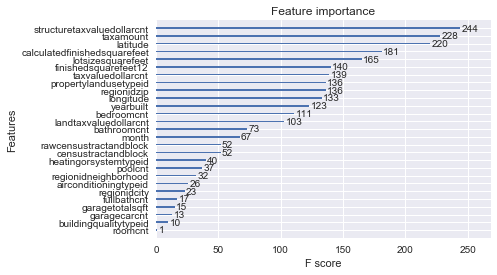

In [44]:
xgb.plot_importance(model) #Feature Importance

In [46]:
test_f = test.drop(['ParcelId','parcelid','201610','201611','201612','201710','201711','201712'],axis=1)

Predicitng the values for the test set which is for all the samples in the properties csv file

In [47]:
test_f['month'] = 10
d_test = xgb.DMatrix(test_f)
p_test_10 = model.predict(d_test,ntree_limit=model.best_ntree_limit)
test_f['month'] = 11
d_test = xgb.DMatrix(test_f)
p_test_11 = model.predict(d_test,ntree_limit=model.best_ntree_limit)
test_f['month'] = 12
d_test = xgb.DMatrix(test_f)
p_test_11 = model.predict(d_test,ntree_limit=model.best_ntree_limit)


Exception AttributeError: "'DMatrix' object has no attribute 'handle'" in <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000002BDEEA20>> ignored


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields hashottuborspa, propertycountylandusecode, propertyzoningdesc, fireplaceflag, taxdelinquencyflag

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

In [ ]:
submission['201610'] = p_test_10
submission['201710'] = p_test_10
submission['201611'] = p_test_11
submission['201711'] = p_test_11
submission['201612'] = p_test_12
submission['201712'] = p_test_12

In [ ]:
submission.to_csv('xgb.csv', index=False, float_format='%.4f')